# <div class="alert alert-success"><strong>PROJET: Data Science Analyse de Données et Web Scraping</strong></div>

## <span style="color:blue">Mouhamadou Afiss DIA</span> 
## MASTER 2 Sécurité Systèmes Embarquée (MS2E)

### <span style="color:red">Let's start</span> .

In [3]:
# Importation des bibliothèques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 989.8 kB/s eta 0:00:001m995.5 kB/s eta 0:00:01


### <span style="color:darkblue"># DataFrame pour l'Equipe de Football Chelsea saison  championnat d'Angleterre 2019_2020</span> . 

In [4]:
df_chelsea_2019_2020 = pd.read_csv("df_matches_Chelsea_PL_2019_2020.csv", index_col=0)
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,1.0,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,1.1,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,1.5,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,2.0,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,2.7,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea


### Légend
* Venue : Match joué à domicile où exterieur 
* W:  Match gagné
* D:  Match Null
* L:  Match perdu
* GF: But marqué pour
* GA: But marqué contre


In [5]:
df_chelsea_2019_2020.shape

(38, 20)

### <span style="color:darkblue"># Le nombre de match gagné, null et perdu de chelsea dans le championnat </span> .

In [6]:
df_chelsea_resultat=df_chelsea_2019_2020.groupby(['Team','Result'])['Result'].count().rename('nbr_matchs').reset_index()
df_chelsea_resultat

,Team,Result,nbr_matchs
0,Chelsea,D,6
1,Chelsea,L,12
2,Chelsea,W,20


### <span style="color:darkblue"># Representation graphique du Le nombre de match gagné, null et perdu de chelsea dans la saison</span> . 

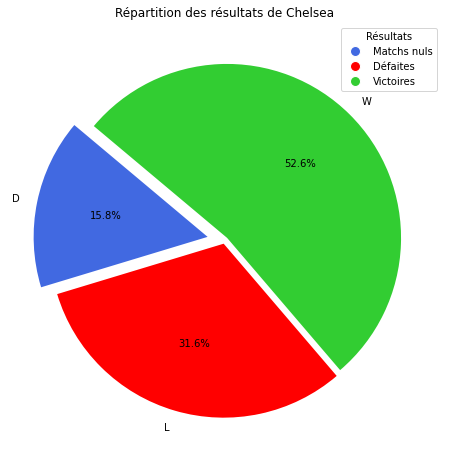

In [7]:
# Données
labels = df_chelsea_resultat['Result']
data = df_chelsea_resultat['nbr_matchs']

# Couleurs significatives
colors = {'W': 'limegreen', 'L': 'red', 'D': 'royalblue'}

# Explosion
explode = [0.1, 0.02, 0.02]

# Créer le diagramme circulaire
plt.figure(figsize=(8, 8))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=[colors[r] for r in labels], explode=explode)

# Titre
plt.title('Répartition des résultats de Chelsea')

# Légende explicative
legend_labels = {'W': 'Victoires', 'L': 'Défaites', 'D': 'Matchs nuls'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[result], 
                    markersize=10, markerfacecolor=colors[result]) for result in labels]

plt.legend(handles=legend_handles, title='Résultats', loc='upper right')

# Afficher le diagramme
plt.show()


### <span style="color:darkblue"># Le nombre de match gagné, null et perdu de chelsea à exterieur et à domicile  </span>.

In [8]:
df_chelsea_HA=df_chelsea_2019_2020.groupby(['Team','Venue','Result'])['Result'].count().rename('nbr_matchs').reset_index()
df_chelsea_HA

,Team,Venue,Result,nbr_matchs
0,Chelsea,Away,D,3
1,Chelsea,Away,L,7
2,Chelsea,Away,W,9
3,Chelsea,Home,D,3
4,Chelsea,Home,L,5
5,Chelsea,Home,W,11


### <span style="color:darkblue"># Representation graphique des matchs gagnés, nulls et perdus de chelsea à domicile et à exterieure</span>.

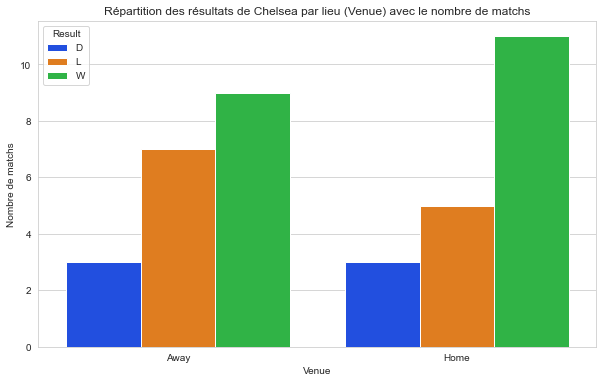

In [10]:
# Données
data = df_chelsea_HA

# Créer le barplot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Style du graphique

sns.barplot(data=data, x="Venue", y="nbr_matchs", hue="Result", palette="bright")

plt.ylabel("Nombre de matchs")
plt.title("Répartition des résultats de Chelsea par lieu (Venue) avec le nombre de matchs")
# Afficher le graphique
plt.show()


### <span style="color:darkblue"># Cherchons maintenant le nombre de but marqués par mois dans la saison</span> . 

In [11]:
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,1.0,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,1.1,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,1.5,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,2.0,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,2.7,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea


In [12]:
df_chelsea_2019_2020['Date'].head()

0    2019-08-11
2    2019-08-18
3    2019-08-24
4    2019-08-31
5    2019-09-14
Name: Date, dtype: object

In [13]:
df_chelsea_2019_2020['Date'] = pd.to_datetime(df_chelsea_2019_2020['Date'])
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,1.0,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,1.1,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,1.5,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,2.0,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,2.7,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea


In [14]:
df_chelsea_2019_2020['date_match'] = df_chelsea_2019_2020['Date'].dt.month
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,date_match
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,...,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea,8
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,...,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea,8
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,...,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea,8
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,...,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea,8
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,...,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea,9


### <span style="color:darkblue"># Convertissons les dates en fonction des mois correspondants</span> .

In [15]:
# Créer un dictionnaire des mois de janvier à décembre avec les chiffres comme clés
dic_annee = {
    1: "Janvier",
    2: "Février",
    3: "Mars",
    4: "Avril",
    5: "Mai",
    6: "Juin",
    7: "Juillet",
    8: "Août",
    9: "Septembre",
    10: "Octobre",
    11: "Novembre",
    12: "Décembre"
}

In [16]:
df_chelsea_2019_2020['date_match'] = df_chelsea_2019_2020['date_match'].map(dic_annee)
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,date_match
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,...,2.2,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea,Août
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,...,0.8,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea,Août
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,...,1.1,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea,Août
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,...,1.1,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea,Août
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,...,1.7,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea,Septembre


### <span style="color:darkblue"># groupby nbr marqués et encaisés </span> .

In [17]:
df_chelsea_month=df_chelsea_2019_2020.groupby(['Team','date_match'])['GF','GA'].sum().reset_index()
df_chelsea_month

C:\Users\DELL\AppData\Local\Temp/ipykernel_9380/865144756.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_chelsea_month=df_chelsea_2019_2020.groupby(['Team','date_match'])['GF','GA'].sum().reset_index()


,Team,date_match,GF,GA
0,Chelsea,Août,6,9
1,Chelsea,Décembre,7,8
2,Chelsea,Février,6,7
3,Chelsea,Janvier,6,4
4,Chelsea,Juillet,14,13
5,Chelsea,Juin,4,2
6,Chelsea,Mars,4,0
7,Chelsea,Novembre,5,4
8,Chelsea,Octobre,9,3
9,Chelsea,Septembre,8,4


In [18]:

# Créer un dictionnaire pour spécifier l'ordre des mois
ordre_mois = {"Janvier": 1,"Février": 2,"Mars": 3,"Avril": 4,"Mai": 5,"Juin": 6,"Juillet": 7,"Août": 8,"Septembre": 9,"Octobre": 10,"Novembre": 11,"Décembre": 12}

# Trier le DataFrame en fonction de l'ordre des mois
df_chelsea_month['date_match'] = df_chelsea_month['date_match'].map(ordre_mois)
df_chelsea_month = df_chelsea_month.sort_values(by='date_match')

# Rétablir le nom des mois
df_chelsea_month['date_match'] = df_chelsea_month['date_match'].map({v: k for k, v in ordre_mois.items()})


In [19]:
df_chelsea_month

,Team,date_match,GF,GA
3,Chelsea,Janvier,6,4
2,Chelsea,Février,6,7
6,Chelsea,Mars,4,0
5,Chelsea,Juin,4,2
4,Chelsea,Juillet,14,13
0,Chelsea,Août,6,9
9,Chelsea,Septembre,8,4
8,Chelsea,Octobre,9,3
7,Chelsea,Novembre,5,4
1,Chelsea,Décembre,7,8


### <span style="color:darkblue"># Représentation graphique des nombres de buts marqués et encaisés en fonction des mois dans la saison à domicile et à exterieure</span>.

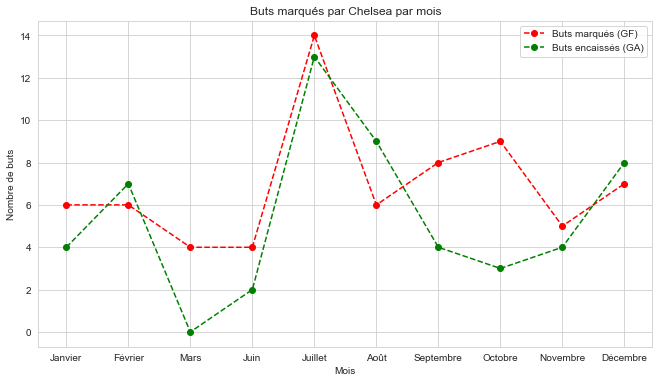

In [20]:
plt.figure(figsize=(11, 6))

# Tracer les données pour les buts marqués (GF) et les buts encaissés (GA)
plt.plot(df_chelsea_month['date_match'], df_chelsea_month["GF"], marker='o', linestyle='--', color='red', label='Buts marqués (GF)')
plt.plot(df_chelsea_month['date_match'], df_chelsea_month["GA"], marker='o', linestyle='--', color='green', label='Buts encaissés (GA)')


# Titre et labels
plt.title("Buts marqués par Chelsea par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de buts")

plt.legend()
plt.show()

### <span style="color:darkblue"># Cherchons la période (matin où soir) où Chelsea est plus fort dans le championnat </span>.

In [21]:
def _periode(hr):
    if hr <= '15:00':
        return 'matin'
    else:
        return 'soir'

In [22]:
df_chelsea_2019_2020['periode'] = df_chelsea_2019_2020['Time'].apply(_periode)

In [23]:
df_chelsea_nbr_but=df_chelsea_2019_2020.groupby(['Team','periode'])['GF'].sum().reset_index()
df_chelsea_nbr_but

,Team,periode,GF
0,Chelsea,matin,36
1,Chelsea,soir,33


In [25]:
df_chelsea_nbr_match=df_chelsea_2019_2020.groupby(['Team','periode'])['Team'].count().rename('nbr_matchs').reset_index()
df_chelsea_nbr_match

,Team,periode,nbr_matchs
0,Chelsea,matin,18
1,Chelsea,soir,20


In [27]:
df_nbr_match_but=df_chelsea_nbr_but.merge(df_chelsea_nbr_match, on=['Team','periode'])
df_nbr_match_but

,Team,periode,GF,nbr_matchs
0,Chelsea,matin,36,18
1,Chelsea,soir,33,20


### <span style="color:darkblue"># Nombre de buts moyennes marqués par match matin et soir </span>.

In [28]:
df_nbr_match_but['mean'] = df_nbr_match_but['GF'] / df_nbr_match_but['nbr_matchs']
df_nbr_match_but

,Team,periode,GF,nbr_matchs,mean
0,Chelsea,matin,36,18,2.00
1,Chelsea,soir,33,20,1.65


In [30]:
df_nbr_match_but.describe()

,GF,nbr_matchs,mean
count,2.00000,2.000000,2.000000
mean,34.50000,19.000000,1.825000
std,2.12132,1.414214,0.247487
min,33.00000,18.000000,1.650000
25%,33.75000,18.500000,1.737500
50%,34.50000,19.000000,1.825000
75%,35.25000,19.500000,1.912500
max,36.00000,20.000000,2.000000


### <span style="color:darkblue"># Representation graphique nombres de buts moyennes par match marqués le matin et le soir </span>.

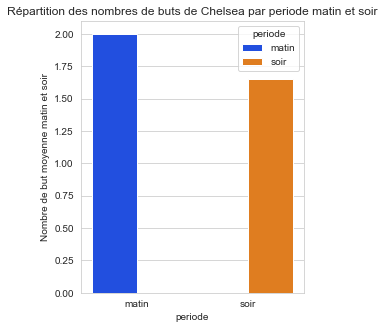

In [31]:
# Données
data = df_nbr_match_but

# Créer le barplot
plt.figure(figsize=(4, 5))
sns.set_style("whitegrid")  # Style du graphique

# Utilisez `hue` pour différencier les résultats (D, L, W) dans le même graphique
sns.barplot(data=data, x="periode", y="mean", hue="periode", palette="bright")

plt.ylabel("Nombre de but moyenne matin et soir")
plt.title("Répartition des nombres de buts de Chelsea par periode matin et soir")
# Afficher le graphique
plt.show()


### <span style="color:darkblue"># Etudions maintenant les Formations que jouaient l'équipe de Chelsea durant la saison </span>.

In [35]:
df_chelsea_2019_2020.head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,...,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,Team,date_match,periode
0,2019-08-11,16:30,Premier League,Matchweek 1,Sun,Away,L,0,4,Manchester Utd,...,54,73620.0,César Azpilicueta,4-2-3-1,Anthony Taylor,Match Report,NaN,Chelsea,Août,soir
2,2019-08-18,16:30,Premier League,Matchweek 2,Sun,Home,D,1,1,Leicester City,...,50,40629.0,César Azpilicueta,4-3-3,Oliver Langford,Match Report,NaN,Chelsea,Août,soir
3,2019-08-24,12:30,Premier League,Matchweek 3,Sat,Away,W,3,2,Norwich City,...,54,27032.0,César Azpilicueta,4-3-3,Martin Atkinson,Match Report,NaN,Chelsea,Août,matin
4,2019-08-31,15:00,Premier League,Matchweek 4,Sat,Home,D,2,2,Sheffield Utd,...,62,40560.0,César Azpilicueta,4-3-3,Stuart Attwell,Match Report,NaN,Chelsea,Août,matin
5,2019-09-14,15:00,Premier League,Matchweek 5,Sat,Away,W,5,2,Wolves,...,54,31534.0,César Azpilicueta,3-4-3,Graham Scott,Match Report,NaN,Chelsea,Septembre,matin


In [33]:
df_chelsea_formation=df_chelsea_2019_2020.groupby(['Team','GF'])
df_chelsea_formation

### <span style="color:darkblue"># Les formations et les nombres de matchs joués pour Chelsea durant la saison </span>.

In [36]:
df_chelsea_formation = df_chelsea_2019_2020.groupby(['Team','Result','Formation'])['Formation'].count().rename('nbr_formation').reset_index()
df_chelsea_formation

,Team,Result,Formation,nbr_formation
0,Chelsea,D,3-4-3,1
1,Chelsea,D,4-2-3-1,1
2,Chelsea,D,4-3-3,4
3,Chelsea,L,3-4-3,2
4,Chelsea,L,4-2-3-1,3
5,Chelsea,L,4-3-3,7
6,Chelsea,W,3-4-3,5
7,Chelsea,W,4-2-3-1,4
8,Chelsea,W,4-3-3,11


### <span style="color:darkblue"># Representation graphique du résultat de chelsea en fonction de des formations joués </span>.

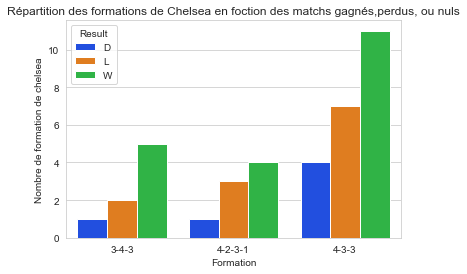

In [37]:
# Données
data = df_chelsea_formation

# Créer le barplot
#plt.figure(figsize=(4, 5))
sns.set_style("whitegrid")  # Style du graphique

# Utilisez `hue` pour différencier les résultats (D, L, W) dans le même graphique
sns.barplot(data=data, x="Formation", y="nbr_formation", hue="Result", palette="bright")

plt.ylabel("Nombre de formation de chelsea")
plt.title("Répartition des formations de Chelsea en foction des matchs gagnés,perdus, ou nuls")
# Afficher le graphique
plt.show()

### <span style="color:darkblue"># Cherchons la meuilleur Formation de l'équipe de Chelsea durant la saison </span>.

In [39]:
# nombre de match joués avec les formations
nbr_formation = df_chelsea_2019_2020.groupby(['Team','Formation'])['Formation'].count().rename('nbr_matchs').reset_index()
nbr_formation

,Team,Formation,nbr_matchs
0,Chelsea,3-4-3,8
1,Chelsea,4-2-3-1,8
2,Chelsea,4-3-3,22


In [41]:
# Nombre de points gagnés pour chaque formations

df_chelsea_formation_win = df_chelsea_formation[df_chelsea_formation['Result']=='W']
df_chelsea_formation_win['nbr_pts_W'] = df_chelsea_formation['nbr_formation']*3
df_chelsea_formation_win

C:\Users\DELL\AppData\Local\Temp/ipykernel_9380/1189041394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chelsea_formation_win['nbr_pts_W'] = df_chelsea_formation['nbr_formation']*3


,Team,Result,Formation,nbr_formation,nbr_pts_W
6,Chelsea,W,3-4-3,5,15
7,Chelsea,W,4-2-3-1,4,12
8,Chelsea,W,4-3-3,11,33


In [45]:
# Nombre de matchs nulls pour les formations 

df_chelsea_formation_drew = df_chelsea_formation[df_chelsea_formation['Result']=='D']
df_chelsea_formation_drew['nbr_pts_D'] = df_chelsea_formation['nbr_formation']
df_chelsea_formation_drew

C:\Users\DELL\AppData\Local\Temp/ipykernel_9380/1812067104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chelsea_formation_drew['nbr_pts_D'] = df_chelsea_formation['nbr_formation']


,Team,Result,Formation,nbr_formation,nbr_pts_D
0,Chelsea,D,3-4-3,1,1
1,Chelsea,D,4-2-3-1,1,1
2,Chelsea,D,4-3-3,4,4


In [46]:
### regrouper les 3 dataframe
df_points_chelsea = [df_chelsea_formation_win, df_chelsea_formation_drew, nbr_formation]

In [47]:
df_chelsea = df_points_chelsea[0]
for i in range(1,len(df_points_chelsea)):
    df_chelsea = df_chelsea.merge(df_points_chelsea[i], on = ['Team', 'Formation'],how='outer', suffixes=('_W','_D'))
df_chelsea['nbr_pts_W_D'] = df_chelsea['nbr_pts_W'] + df_chelsea['nbr_pts_D']
df_chelsea

,Team,Result_W,Formation,nbr_formation_W,nbr_pts_W,Result_D,nbr_formation_D,nbr_pts_D,nbr_matchs,nbr_pts_W_D
0,Chelsea,W,3-4-3,5,15,D,1,1,8,16
1,Chelsea,W,4-2-3-1,4,12,D,1,1,8,13
2,Chelsea,W,4-3-3,11,33,D,4,4,22,37


### <span style="color:darkblue"># Calculons la moyenne des points gagné par formation</span>.

In [48]:
# Effectuez l'opération de groupby et de transformation
df_chelsea['moyenne_formation'] = df_chelsea.groupby(['Team', 'Formation'])['nbr_pts_W_D'].transform(lambda x: x / (df_chelsea['nbr_matchs'] * 3))

# Sélectionnez uniquement les colonnes nécessaires
df_chelsea = df_chelsea[['Team', 'Formation', 'moyenne_formation']]

In [49]:
df_chelsea

,Team,Formation,moyenne_formation
0,Chelsea,3-4-3,0.666667
1,Chelsea,4-2-3-1,0.541667
2,Chelsea,4-3-3,0.560606


### <span style="color:darkblue"># Représentation graphique moyennes des matchs gagnés par formation </span>.

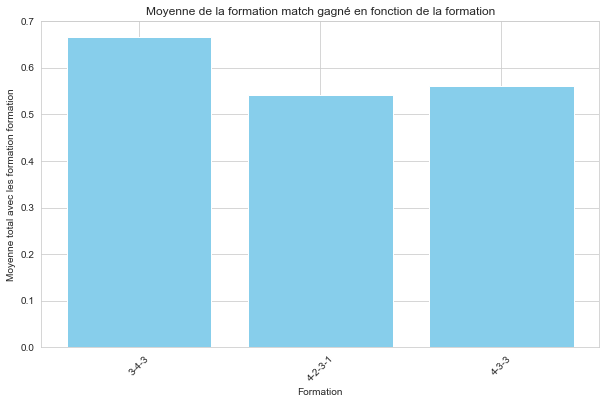

In [51]:

# Données
formations = df_chelsea['Formation']
moyennes = df_chelsea['moyenne_formation']

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(formations, moyennes, color='skyblue')

# Titre et labels
plt.title("Moyenne de la formation match gagné en fonction de la formation")
plt.xlabel("Formation")
plt.ylabel("Moyenne total avec les formation formation")

# Rotation des étiquettes des formations pour une meilleure lisibilité
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


In [ ]:
#############################"" conclusion ************************************************